## Trabalho T1 de Processamento Digital de Imagens 

### Introdução:

Em primeiro lugar, vamos realizar a leitura da imagem 'xray.jpg'. Assim, iremos carregar a imagem na variavel `frame` já em escala de cinza.

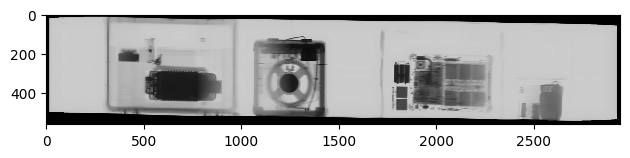

In [14]:
from skimage.io import imread, imshow

frame = imread("xray.jpg", as_gray=True)
imshow(frame)

### Compreensão do histograma

Agora, vamos compreender como é a composição do histograma da imagem.

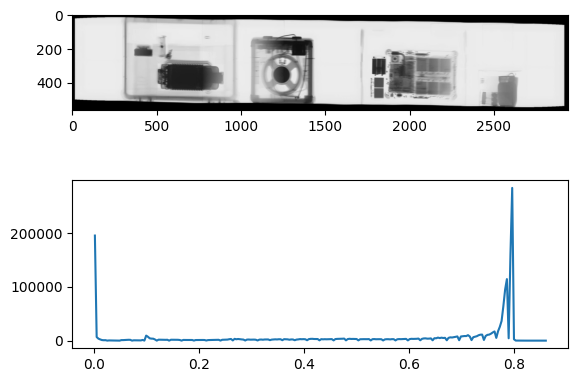

In [15]:
from skimage.exposure import histogram
import matplotlib.pyplot as plt

hist, bins = histogram(frame)

fig, axes = plt.subplots(2, 1)
axes[0].imshow(frame, cmap="gray")
axes[1].plot(bins, hist)

Após vizualizarmos o histograma, podemos observar que ele está mal equalizado, ou seja com intenisdade mal definidas, cabendo a aplicação de uma equalização. 

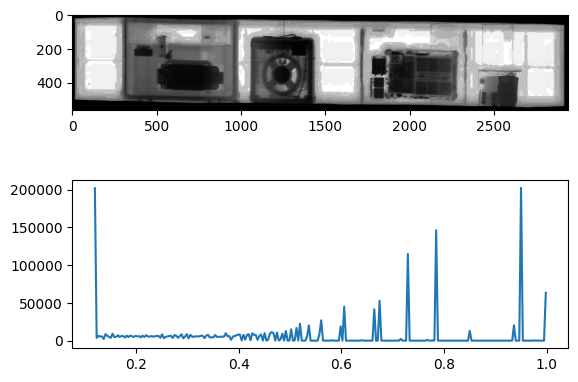

In [16]:
import matplotlib.pyplot as plt
from skimage.exposure import equalize_hist
from skimage.exposure import histogram

equalized_frame = equalize_hist(frame)
equalized_hist, equalized_bins = histogram(equalized_frame)

fig, axes = plt.subplots(2, 1)
axes[0].imshow(equalized_frame, cmap="gray")
axes[1].plot(equalized_bins, equalized_hist)

Agora, comparando a imagem não equalizada e a imagem equalizada

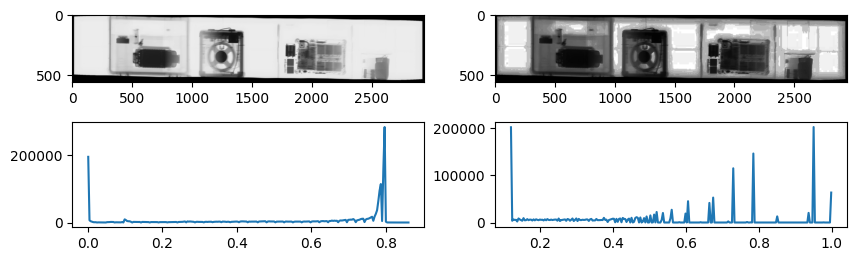

In [17]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(10,3))
axes[1,1].plot(equalized_bins, equalized_hist)
axes[0,1].imshow(equalized_frame, cmap="gray")
axes[1,0].plot(bins, hist)
axes[0,0].imshow(frame, cmap="gray")

Agora vamos aplicar um filtro de borramento e a equalização para vermos se conseguimos um histograma mais distribuido.

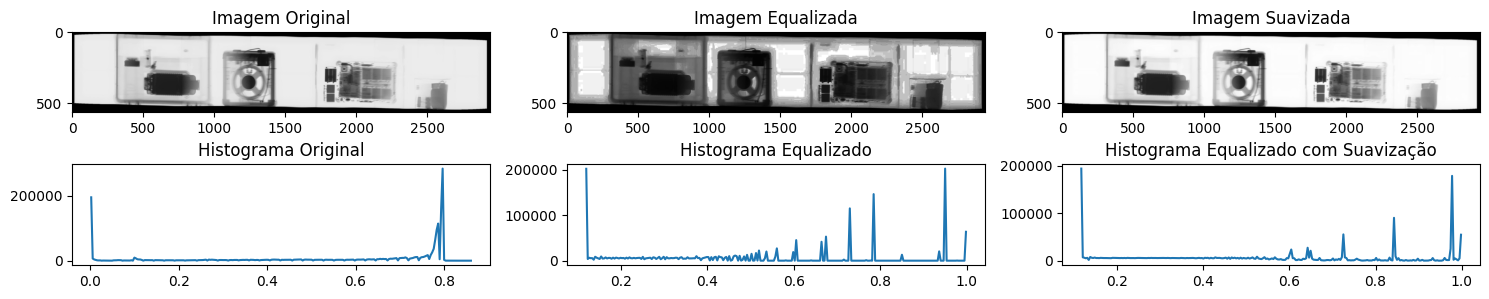

In [18]:
import matplotlib.pyplot as plt
from skimage.exposure import equalize_hist
from skimage.exposure import histogram
from skimage.filters import gaussian

blured_frame = gaussian(frame)
blur_equalized_frame = equalize_hist(blured_frame)
blur_equalized_hist, blur_equalized_bins = histogram(blur_equalized_frame)

fig, axes = plt.subplots(2, 3, figsize=(15, 3))

# Coluna 1: Imagem original e histograma
axes[0, 0].imshow(frame, cmap="gray")
axes[0, 0].set_title("Imagem Original")
axes[1, 0].plot(bins, hist)
axes[1, 0].set_title("Histograma Original")
# Coluna 2: Imagem equalizada e histograma
axes[0, 1].imshow(equalized_frame, cmap="gray")
axes[0, 1].set_title("Imagem Equalizada")
axes[1, 1].plot(equalized_bins, equalized_hist)
axes[1, 1].set_title("Histograma Equalizado")
# Coluna 3: Imagem suavizada e histograma
axes[0, 2].imshow(blured_frame, cmap="gray")
axes[0, 2].set_title("Imagem Suavizada")
axes[1, 2].plot(blur_equalized_bins, blur_equalized_hist)
axes[1, 2].set_title("Histograma Equalizado com Suavização")

# Ajusta o espaçamento entre os subplots para melhorar a legibilidade
fig.tight_layout()

Aqui, podemos perceber que o uso do filtro gaussiano para efeito de blur levou a perda de caracteristicas da imagem. Portanto iremos adotar apenas a equalização do histograma.

### Binarização do raio X

Após realizarmos os ajustes de intensidades, iremos aplicar uma binarização para removermos alguns ruidos presentes na imagem. 

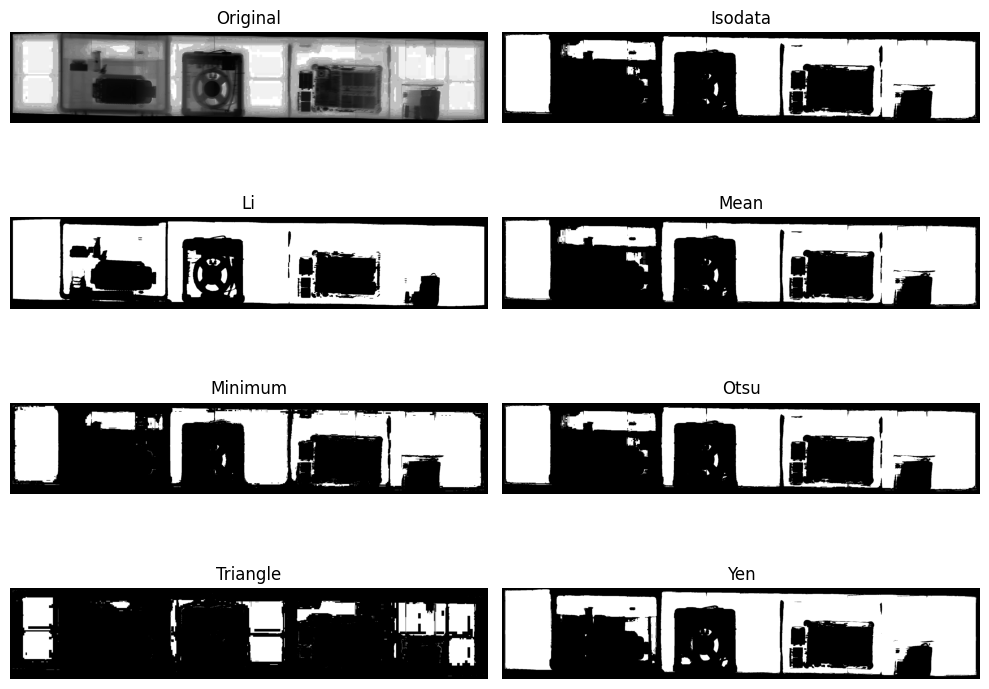

In [19]:
from skimage.io import imshow
from skimage.filters import try_all_threshold

fig, ax = try_all_threshold(equalized_frame, figsize=(10, 8), verbose=False)
plt.show()

Após aplicar todos as tecnicas de threshold, pode-se perceber que a que melhor conservou as caracteristicas da imagem foi o Threshold Li. Agora iremos explorar ele em mais detalhes. 

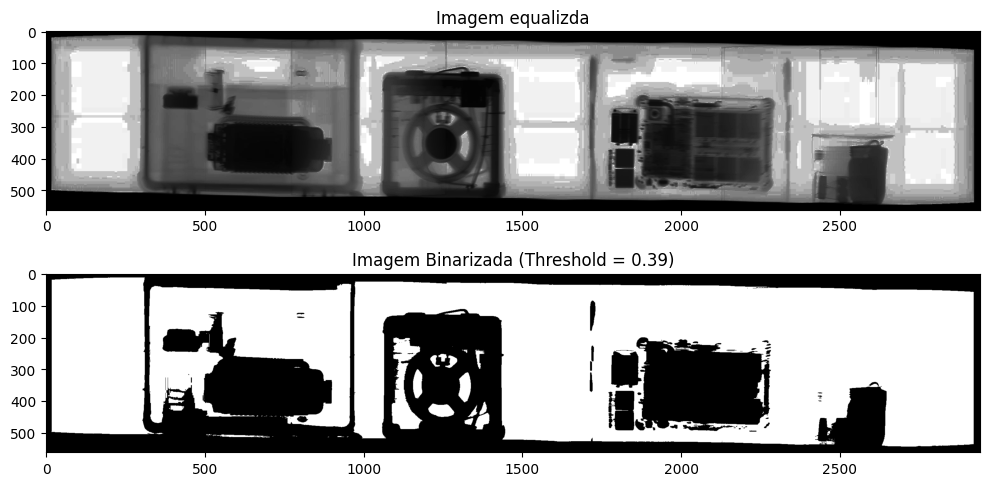

In [20]:
from skimage.filters import threshold_li

# Aplicar o threshold de Li
li_threshold = threshold_li(equalized_frame)
# Criar uma imagem binarizada com o valor do threshold
binary_frame = equalized_frame > li_threshold


# Mostrar os resultados
fig, axes = plt.subplots(2, 1, figsize=(10, 5))
axes[0].imshow(equalized_frame, cmap=plt.cm.gray)
axes[0].set_title('Imagem equalizda')
axes[1].imshow(binary_frame, cmap=plt.cm.gray)
axes[1].set_title(f'Imagem Binarizada (Threshold = {li_threshold:.2f})')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

### Remoção de Ruidos

Identificando a barra preta

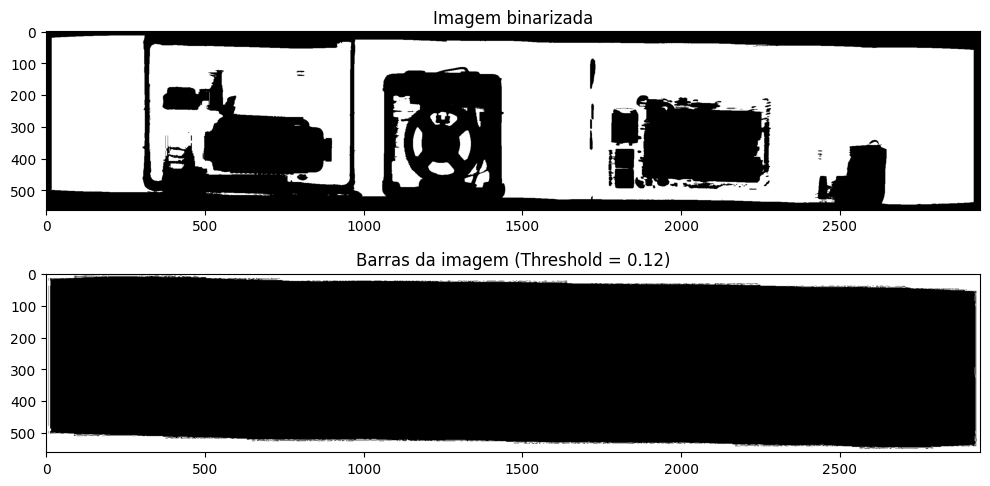

In [21]:
barras_da_imagem = equalized_frame > 0.12
barras_da_imagem = 1 - barras_da_imagem

# Mostrar os resultados
fig, axes = plt.subplots(2, 1, figsize=(10, 5))
axes[0].imshow(binary_frame, cmap=plt.cm.gray)
axes[0].set_title('Imagem binarizada')
axes[1].imshow(barras_da_imagem, cmap=plt.cm.gray)
axes[1].set_title(f'Barras da imagem (Threshold = 0.12)')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

Aplicando a remocao das barras:

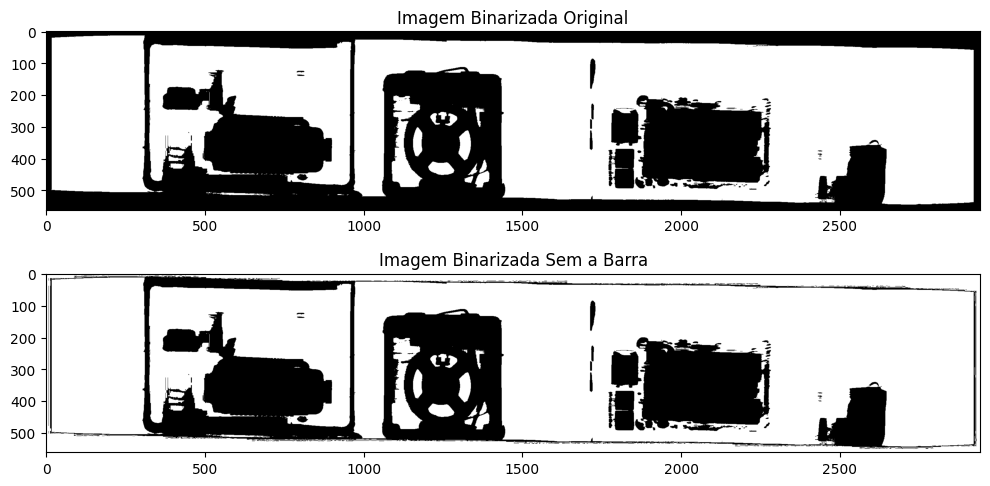

In [22]:
frame = binary_frame + barras_da_imagem
# Mostrar os resultados
fig, axes = plt.subplots(2, 1, figsize=(10, 5))
axes[0].imshow(binary_frame, cmap=plt.cm.gray)
axes[0].set_title('Imagem Binarizada Original')
axes[1].imshow(frame, cmap=plt.cm.gray)
axes[1].set_title(f'Imagem Binarizada Sem a Barra')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

Agora iremos aplicar uma etapa de fechamento para tirar ruidos pretos da imagem 

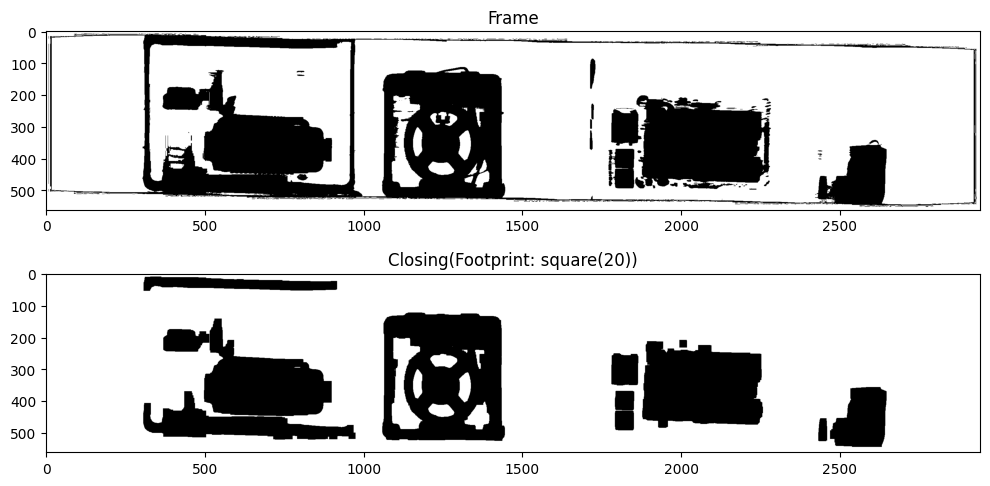

In [23]:
from skimage.morphology import binary_closing, square
from skimage.io import imshow

closing_mask = 20
frame_closing = binary_closing(frame, footprint=square(closing_mask))

# Mostrar os resultados
fig, axes = plt.subplots(2, 1, figsize=(10, 5))
axes[0].imshow(frame, cmap=plt.cm.gray)
axes[0].set_title(f'Frame')
axes[1].imshow(frame_closing, cmap=plt.cm.gray)
axes[1].set_title(f'Closing(Footprint: square({closing_mask}))')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

frame = frame_closing

### Segmentação da imagem